# Risk-Return Analysis of Popular Stock Indices


## I. Introduction

**Background**

This financial analysis case study is aiming at implementing the Sharpe Ratio to figure out three of the big tech giants-Amazon, Meta and Tesla, which stock price could provide higher amount of return under the same unit of risk.

**The Sharpe Ratio**

The Sharpe Ratio is a financial measurement which is used to assess the risk-adjusted return of a portfolio. It calculates the excess return earned comparing to a risk-free asset and help investors evaluate the risk-adjusted performance of their investment. To evaluate it, a higher Sharpe Ratio is better when comparing similar portfolios.

The formula is $$ Sharpe\, Ratio = \frac{R_p - R_f}{\sigma_p}$$

**Data**

The data using in this project are 2022 US stock indices provided from Investing.com, including S&P 500, AMZN, META, TSLA.\
To simply the scale of the project, the benchmark used here is stock index(S&P 500) rather than the risk-free interest rate because both of them are in daily frequencies and do not need to be converted from annual frequency.


## II. Analysis

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('fivethirtyeight')

### Preprocess Data

In [2]:
# Loading and preprocessing data
meta = pd.read_csv('data/Meta.csv', parse_dates=['Date'])[['Date','Close/Last']]
meta.columns = ['Date','Meta']
meta['Meta'] = [str(i).strip('$,') for i in meta['Meta']]

amazon = pd.read_csv('data/amazon.csv', parse_dates=['Date'])[['Date','Close/Last']]
amazon.columns = ['Date','Amazon']
amazon['Amazon'] = [str(i).strip('$,') for i in amazon['Amazon']]

tesla = pd.read_csv('data/tesla.csv', parse_dates=['Date'])[['Date','Close/Last']]
tesla.columns = ['Date','Tesla']
tesla['Tesla'] = [str(i).strip('$,') for i in tesla['Tesla']]

sp500 = pd.read_csv('data/S&P.csv',parse_dates=['Date'])[['Date','Close']]
sp500.columns = ['Date', 'S&P 500']
sp500['S&P 500'] = [float(str(i).replace(',','')) for i in sp500['S&P 500']]

# Merging Amazon,Meta and Tesla stock price data
stock_data = pd.merge(pd.merge(amazon, meta, on = ['Date']), tesla, on=['Date'])
benchmark_data = sp500

# Changing data type and setting index
stock_data = stock_data.astype({'Amazon':'float', 'Meta':'float', 'Tesla':'float'}).set_index('Date', drop = True, inplace = False)
benchmark_data = benchmark_data.set_index('Date', drop = True, inplace = False)

In [3]:
# Display summary for stock_data
print('Stocks data from 20211220 to 20221216 : \n')
stock_data.info()

Stocks data from 20211220 to 20221216 : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-16 to 2021-12-20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amazon  251 non-null    float64
 1   Meta    251 non-null    float64
 2   Tesla   251 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


In [4]:
stock_data.head(5)

,Amazon,Meta,Tesla
Date,,,
2022-12-16,87.86,119.43,150.23
2022-12-15,88.45,116.15,157.67
2022-12-14,91.58,121.59,156.80
2022-12-13,92.49,120.15,160.95
2022-12-12,90.55,114.71,167.82


In [5]:
# Display summary for benchmark_data
print('Benchmarks data from 20211220 to 20221216\n')
benchmark_data.info()

Benchmarks data from 20211220 to 20221216

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-16 to 2021-12-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [6]:
benchmark_data.head(5)

,S&P 500
Date,
2022-12-16,3852.36
2022-12-15,3895.75
2022-12-14,3995.32
2022-12-13,4019.65
2022-12-12,3990.56


### Visualize and summarize daily stock prices

,Amazon,Meta,Tesla
count,251.000000,251.000000,251.000000
mean,129.148757,188.083307,270.912973
std,23.806518,62.487098,53.521142
min,86.140000,88.910000,150.230000
25%,111.018750,146.190000,232.446650
50%,125.511000,175.780000,276.366600
75%,150.954750,211.310000,306.348300
max,171.068500,346.220000,399.926600


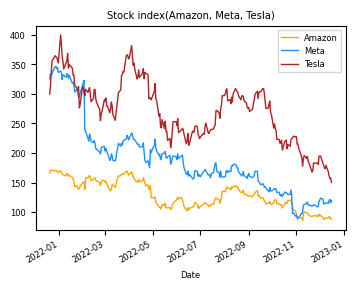

In [7]:
# Visualize the stock_data
matplotlib.rcParams.update({'font.size': 6})
stock_data.plot(figsize=(4,3), 
                linewidth = 1,
                color = ['orange', 'dodgerblue', 'firebrick'],
                )
plt.title('Stock index(Amazon, Meta, Tesla)')
# Summarize the stock_data
stock_data.describe()

From 2022 to 2023 these three stock price has a trend in decreasing, and the stock of Tesla exhibits more noticeable price fluctuation while Amazon has less.

,S&P 500
count,251.000000
mean,4130.661873
std,309.869312
min,3577.030000
25%,3900.825000
50%,4088.850000
75%,4389.115000
max,4796.560000


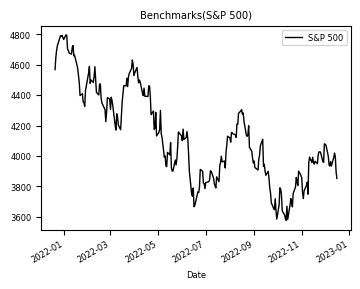

In [8]:
# Visualize the benchmark_data
matplotlib.rcParams.update({'font.size': 6})
benchmark_data.plot(title='Benchmarks(S&P 500)', 
                    figsize = (4,3), 
                    linewidth = 1,
                    color='black')

# Summarize the benchmark_data
benchmark_data.describe()

S&P 500 also experiences a decreasing trend in its price. Despite the overall decreasing trend, the price of S&P fluctuated over time. The highest price occurred in January 2022, and the lowest occurred around October 2022. As for the reason, based on my understanding, it might be affected by Ukraine war, the low Chinese economy due to continuous Covid and the interest rated raised by Fed which cause decreasing in stock prices. 

### Calculate Daily Stock Returns

,Amazon,Meta,Tesla
count,250.000000,250.000000,250.000000
mean,0.003067,0.004946,0.003619
std,0.031534,0.044994,0.041461
min,-0.119221,-0.149614,-0.119188
25%,-0.015584,-0.016098,-0.020292
50%,0.002936,0.002127,0.000522
75%,0.019975,0.021977,0.026834
max,0.163460,0.358513,0.138746


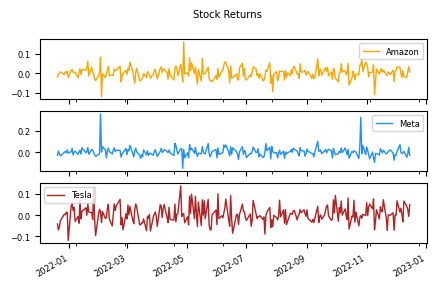

In [9]:
# Calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# Plot the daily returns
matplotlib.rcParams.update({'font.size': 6})
stock_returns.plot(subplots=True,
                    title='Stock Returns', 
                    xlabel='', 
                    figsize=(5,3),
                    linewidth = 1,
                    color = ['orange', 'dodgerblue', 'firebrick'])

# Summarize the daily returns
stock_returns.describe()

,S&P 500
count,250.000000
mean,0.000797
std,0.015250
min,-0.052523
25%,-0.009440
50%,0.001373
75%,0.009693
max,0.045190


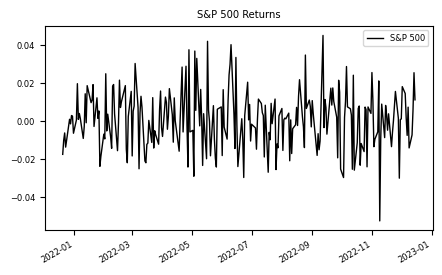

In [10]:
# Calculate daily benchmark_data returns
sp_returns = benchmark_data.pct_change()

# Plot the daily returns
matplotlib.rcParams.update({'font.size': 6})
sp_returns.plot(title='S&P 500 Returns', 
                xlabel='', 
                figsize=(5,3),
                linewidth = 1,
                color='black')
# Summarize the daily returns
sp_returns.describe()

### Calculate excess returns
Relative performance of stocks vs. the S&P 500 benchmarks

,Amazon,Meta,Tesla
count,250.000000,250.000000,250.000000
mean,0.002269,0.004149,0.002821
std,0.021568,0.037860,0.033576
min,-0.114091,-0.125464,-0.112855
25%,-0.009355,-0.011354,-0.016584
50%,0.002875,0.001386,-0.000247
75%,0.013317,0.014872,0.020662
max,0.125809,0.333512,0.125223


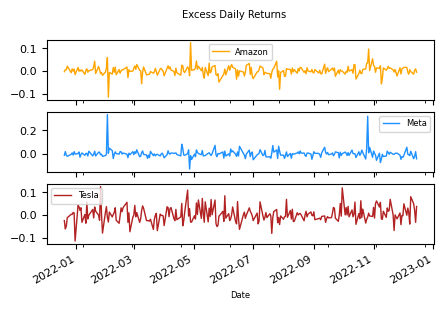

In [11]:
# Calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns['S&P 500'], axis=0)

# Plot the excess_returns
excess_returns.plot(subplots=True, 
                    title = 'Excess Daily Returns', 
                    figsize = (5,3),
                    linewidth = 1,
                    color = ['orange', 'dodgerblue', 'firebrick'],
                    fontsize = 8)

# Summarize the excess_returns
excess_returns.describe()

### Calculate average difference in daily returns and S&P 500

Text(0.5, 1.0, 'Mean of the Return Difference')

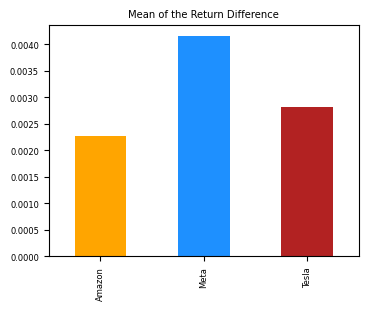

In [12]:
# Calculate average difference
avg_excess_return = excess_returns.mean()

# Plot average difference
matplotlib.rcParams.update({'font.size': 6})
avg_excess_return.plot.bar(figsize = (4,3), color = ['orange', 'dodgerblue', 'firebrick'])
plt.title('Mean of the Return Difference')

Based on the result, it shows that Meta has a little higher excess return compared to S&P 500 than the other two.

### Standard Deviation of the Return Difference

Text(0.5, 1.0, 'Standard Deviation of the Return Difference')

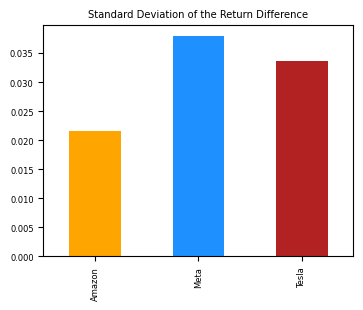

In [13]:
# Calculate standard deviation
sd_excess_return = excess_returns.std()

# Plot the standard deviation
matplotlib.rcParams.update({'font.size': 6})
sd_excess_return.plot.bar(figsize = (4,3), color = ['orange', 'dodgerblue', 'firebrick'])
plt.title('Standard Deviation of the Return Difference')

The standard deviation of the return difference shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500. The result indicated the relative risk of investing in Meta is higher in this case followed by Tesla, and then Amazon.

### Daily Sharpe Ratio
The final calculation is finally the Sharpe Ratio and it indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk. To make the Sharpe Ratio more comparable on an annual basis, the Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods.($\sqrt(250)$)

Annulized Sharpe Ratio:
 Amazon    1.663605
Meta      1.732522
Tesla     1.328669
dtype: float64


Text(0.5, 1.0, 'Annualized Sharpe Ratio: Stocks vs S&P 500')

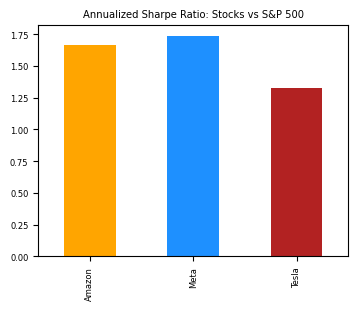

In [14]:
# Calculate the daily sharpe ration
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Annualize the Sharpe Ratio
annual_factor = np.sqrt(250)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Plot the annualized the sharpe ratio
matplotlib.rcParams.update({'font.size': 6})
print(f'Annulized Sharpe Ratio:\n {annual_sharpe_ratio}')
annual_sharpe_ratio.plot.bar(figsize=(4,3),color = ['orange', 'dodgerblue', 'firebrick'])
plt.title('Annualized Sharpe Ratio: Stocks vs S&P 500')

## III. Conclusion

**Sharpe Ratio Analysis**
1. All three stocks have Sharpe Ratio larger than 1, indicating that each of these three stocks (AMZN, META, TSLA) has generated excess return per unit of risk that higher than the information rate (S&P 500). It suggests that these three stocks have provided attractive risk-adjusted returns.
2. Among all annualized Sharpe Ratio, Meta exhibits highest ratio with 1.7, followed by Amazon 1.66 and then Tesla 1.32. It indicates that on a risk-adjusted basis, Meta outperformed Amazon and Tesla under the same amount of risk, in other word, Meta would be the most favorable investment option among the three. 

**Volatility**
1. The analysis reveals that Meta has a little bit higher volatility among the three stocks, which means that it has experienced larger fluctuation. While that, Meta has also provided the highest excess return resulting in overall higher ratio.
